In [1]:
import numpy as np
from sklearn.datasets import make_regression

# Generate a model data set for a linear regression problem with one target variable and four features, two of which are informative. Set the parameter that determines the degree of data scatter to 5.0. Ensure reproducible results by setting the appropriate parameter.


X, y = make_regression(n_samples=100, n_features=4, n_informative=2, noise=5.0, random_state=0)

In [2]:
from sklearn.model_selection import train_test_split

# Split the resulting data set into training and test samples in the ratio 70/30.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
# Build linear regression models using L2- and L1-regularizers. Train these models on the training set using the following values of the regularization coefficient: 0.001, 0.01, 0.2, 1, 2, 10.


from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

lasso = Lasso(alpha=0.001)
ridge = Ridge(alpha=0.01)
elastic = ElasticNet(alpha=0.2)

lasso1 = Lasso(alpha=1)
ridge1 = Ridge(alpha=2)
elastic1 = ElasticNet(alpha=10)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)

lasso1.fit(X_train, y_train)
ridge1.fit(X_train, y_train)
elastic1.fit(X_train, y_train)

ElasticNet(alpha=10)

In [4]:
# For each trained model, obtain predictions on the objects of the test set.


y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_elastic = elastic.predict(X_test)

y_pred_lasso1 = lasso1.predict(X_test)
y_pred_ridge1 = ridge1.predict(X_test)
y_pred_elastic1 = elastic1.predict(X_test)

In [5]:
# Display the coefficients of the regression equations obtained after training each model. Write down the corresponding regression equations.


print(lasso.coef_)
print(ridge.coef_)
print(elastic.coef_)
print()
print(lasso1.coef_)
print(ridge1.coef_)
print(elastic1.coef_)

[ 1.18434155 -0.60426675 34.85442639 21.23673028]
[ 1.18676142 -0.60492807 34.84995139 21.23399997]
[ 2.03128531 -0.21709484 31.34360503 18.81924574]

[ 0.33075435 -0.         33.92684236 20.26102739]
[ 1.49960789 -0.51241457 33.79674367 20.51231871]
[0.74192035 0.         4.85745424 2.30698229]


In [6]:
# Display the mean squared error of the regression models obtained after training each model.


print(lasso.score(X_test, y_test))
print(ridge.score(X_test, y_test))
print(elastic.score(X_test, y_test))
print()
print(lasso1.score(X_test, y_test))
print(ridge1.score(X_test, y_test))
print(elastic1.score(X_test, y_test))

0.975799136008617
0.9758079325595335
0.9741868032785246

0.9791240612231039
0.9776873726267483
0.21370416717473317


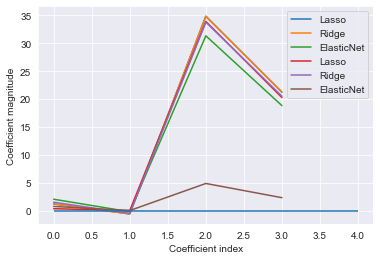

In [7]:
# Plot the training and test errors of the regression models obtained after training each model.


import matplotlib.pyplot as plt

plt.plot(lasso.coef_, label='Lasso')
plt.plot(ridge.coef_, label='Ridge')
plt.plot(elastic.coef_, label='ElasticNet')

plt.plot(lasso1.coef_, label='Lasso')
plt.plot(ridge1.coef_, label='Ridge')
plt.plot(elastic1.coef_, label='ElasticNet')

plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lasso.coef_))
plt.legend()
plt.show()

In [8]:
# Select the best model based on the test error of the models.


from sklearn.metrics import mean_squared_error


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


print(rmse(y_test, y_pred_lasso))
print(rmse(y_test, y_pred_ridge))
print(rmse(y_test, y_pred_elastic))
print()
print(rmse(y_test, y_pred_lasso1))
print(rmse(y_test, y_pred_ridge1))
print(rmse(y_test, y_pred_elastic1))

5.8046379233726535
5.803582890093445
5.994881391058121

5.391166027636729
5.573590480166397
33.08664154671621


In [9]:
# The best model is the one with the lowest test error.